In [1]:
!pip install tensorflow
!pip install nltk
import os
import sys
import nltk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import logging
import random
# from XAI_functions import get_synsets, get_top_predictions
from datetime import datetime, timezone
from collections import Counter
from nltk.corpus import wordnet as wn
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
nltk.download('omw-1.4')
nltk.download('wordnet')

# choose the number of the top predictions and the model that will be used (ResNet, VGG, GoogLeNet, EfficientNet, NASNetLarge or MobileNetV2)
MODEL = 'ResNet'
TOP = 3
threshold = 1e-6

# Create a main folder for logging files
log_folder = "logs"

if not os.path.exists(log_folder):
    os.makedirs(log_folder)

# Get the current time with timezone
current_time = datetime.now(timezone.utc)

# Format the time to include timezone information in the file name
file_name = os.path.join(log_folder, current_time.strftime("%Y-%m-%d_%H-%M-%S_%Z") + ".DEBUG")
print(file_name)

# Configure logging
logging.basicConfig(filename=file_name, level=logging.DEBUG)

# Path to a single folder
main_folder = "Images"
if not os.path.isdir(main_folder):
    logging.error("Invalid folder path.")
    exit()
    
# Read the undirected graphs from the file based of the selected model
if MODEL == 'ResNet':
    G_undirected_path = "graphs\\ResNet_G_undirected.graphml"
    G_distances_path = "graphs\\ResNet_G_distances.graphml"
elif MODEL == 'VGG':
    G_undirected_path = "graphs\\VGG_G_undirected.graphml"
    G_distances_path = "graphs\\VGG_G_distances.graphml"
elif MODEL == 'GoogLeNet':
    G_undirected_path = "graphs\\GoogLeNet_G_undirected.graphml"
    G_distances_path = "graphs\\GoogLeNet_G_distances.graphml"
elif MODEL == 'EfficientNet':
    G_undirected_path = "graphs\\EfficientNet_G_undirected.graphml"
    G_distances_path = "graphs\\EfficientNet_G_distances.graphml"
elif MODEL == 'NASNetLarge':
    G_undirected_path = "graphs\\NASNetLarge_G_undirected.graphml"
    G_distances_path = "graphs\\NASNetLarge_G_distances.graphml"
elif MODEL == 'MobileNetV2':
    G_undirected_path = "graphs\\MobileNetV2_G_undirected.graphml"
    G_distances_path = "graphs\\MobileNetV2_G_distances.graphml"


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


logs\2024-08-05_14-41-58_UTC.DEBUG


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\koren\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\koren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def get_synsets(folder_name):
    synsets = wn.synset_from_pos_and_offset('n', int(folder_name[1:]))
    return synsets.lemma_names()[0]


def folder_name_to_number(folder_name):
    synsets = wn.synsets(folder_name)
    
    # Check if any synsets are found
    if synsets:
        offset = synsets[0].offset()        
        folder_number = 'n{:08d}'.format(offset)
        return folder_number

def get_top_predictions_by_ResNet(image_path, top=3):
    try:
        # Get the top prediction for the image by using ResNet_model
        ResNet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=True)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        predictions = ResNet_model.predict(img_array)
        decoded_predictions = tf.keras.applications.resnet50.decode_predictions(predictions, top=top)
        
        # Get the top predictions for the image
        return decoded_predictions

    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return []
    
def get_top_predictions_by_VGG(image_path, top=3):
    try:
        # Get the top prediction for the image by using VGG_model
        VGG_model = tf.keras.applications.VGG16(weights='imagenet')
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        predictions = VGG_model.predict(img_array)
        decoded_predictions = tf.keras.applications.vgg16.decode_predictions(predictions, top=top)
        
        # Get the top predictions for the image
        return decoded_predictions

    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return []
    
def get_top_predictions_by_GoogLeNet(image_path, top=3):
    try:
        # Get the top prediction for the image by using GoogLeNet_model
        GoogLeNet_model = tf.keras.applications.InceptionV3(weights='imagenet')
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        predictions = GoogLeNet_model.predict(img_array)
        decoded_predictions = tf.keras.applications.inception_v3.decode_predictions(predictions, top=top)
        
        # Get the top predictions for the image
        return decoded_predictions

    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return []
    
def get_top_predictions_by_EfficientNet(image_path, top=3):
    try:
        # Get the top prediction for the image by using EfficientNet_model
        EfficientNet_model = tf.keras.applications.EfficientNetB0(weights='imagenet')
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        predictions = EfficientNet_model.predict(img_array)
        decoded_predictions = tf.keras.applications.efficientnet.decode_predictions(predictions, top=top)
        
        # Get the top predictions for the image
        return decoded_predictions

    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return []
    
def get_top_predictions_by_NASNetLarge(image_path, top=3):
    try:
        # Get the top prediction for the image by using NASNetLarge_model
        NASNetLarge_model = tf.keras.applications.NASNetLarge(weights='imagenet')
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(331, 331))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.keras.applications.nasnet.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        predictions = NASNetLarge_model.predict(img_array)
        decoded_predictions = tf.keras.applications.nasnet.decode_predictions(predictions, top=top)
        
        # Get the top predictions for the image
        return decoded_predictions

    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return []
    
def get_top_predictions_by_MobileNetV2(image_path, top=3):
    try:
        # Get the top prediction for the image by using MobileNetV2
        MobileNetV2_model = tf.keras.applications.MobileNetV2(weights='imagenet')
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        predictions = MobileNetV2_model.predict(img_array)
        decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=top)
        
        # Get the top predictions for the image
        return decoded_predictions

    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return []
def get_hierarchy(category):
    synsets = wn.synset(category)
    #print(synsets)
    hypernyms = synsets.hypernym_paths()
    #print(len(hypernyms[0]))
    #print(hypernyms[0])
    hierarchy = []
    for path in hypernyms[0]:
        hierarchy.append(path.name().split('.')[0])
    return hierarchy[:-1]

def common_group(groups):
    common_hypernyms = []
    hierarchy = {}
    
    # Get the synsets for each input name
    for group in groups:
        
        # Initialize an empty list for each category folder key
        hierarchy[group] = []
        
        # Extract hypernyms for each category
        synsets = wn.synset(group)
        if synsets:
           
            hypernyms = synsets.hypernym_paths()
            for path in hypernyms[0]:
                print(path)                                  
                hierarchy[group].extend([path.name().split('.')[0] ])
            
    # Check common hypernyms
    if len(hierarchy) == 1:
        common_hypernyms = list(hierarchy.values())[0]
    else:
        for hypernym in hierarchy[groups.pop()]:
            if all(hypernym in hypernyms for hypernyms in hierarchy.values()):
                common_hypernyms.append(hypernym)
    
    return common_hypernyms[::-1]



In [ ]:
folder_names = os.listdir(main_folder)
new_categories = []
for folder_name in folder_names:
    if folder_name[:1] == 'n':
        print(folder_name[1:])
        synsets = wn.synset_from_pos_and_offset('n', int(folder_name[1:]))
        print(synsets)
        new_categories.append(synsets.lemma_names()[0])
        print(synsets.lemma_names()[0])
    

In [ ]:
# Create a graph

G = nx.Graph()

# Create a new graph which contains the same graph but with reversed weights
# to get low weightS in the case of high connection and high weights for low connection
G_distances = nx.Graph()

# Get a list of folder names in the specified directory
folder_names = os.listdir(main_folder)

# Format the time to include timezone information in the file name
file_name = os.path.join(log_folder, current_time.strftime("%Y-%m-%d_%H-%M-%S_%Z") + ".RESULT")
print (file_name)

# Iterate over each folder name
categories = []
for folder_name in folder_names:
    if folder_name[:1] == 'n':
        synsets = wn.synset_from_pos_and_offset('n', int(folder_name[1:]))
        categories.append(synsets.lemma_names()[0])
    
# Add nodes for each category
for category in categories:
    G.add_node(category)
    G_distances.add_node(category)



In [3]:
# Redirect output to debug log file
#sys.stdout = open(f'{file_name}.log', 'w')
print(G_undirected_path)
print(G_distances_path)
G = nx.read_graphml(G_undirected_path)
G_distances = nx.read_graphml(G_distances_path)
original_nodes= list(G_distances.nodes)


print(f"number of nodes {G_distances.number_of_nodes()}")     
print(f"number of edges {G_distances.number_of_edges()}")  



graphs\ResNet_G_undirected.graphml
graphs\ResNet_G_distances.graphml
number of nodes 998
number of edges 497502


In [4]:


selected_categories = ["Persian_cat", "tabby", "Madagascar_cat", "Egyptian_cat", 
                      "pug", "boxer", "Norwich_terrier", "kuvasz",
                      "minivan", "police_van", "sports_car", "limousine", "jeep",
                      "airliner", "warplane", "space_shuttle",
                      "catamaran", "trimaran", "container_ship", "fireboat",
                      "American_coot", "black_swan", "white_stork", "flamingo",
                      "teapot", "coffeepot", 
                      "wok", "frying_pan", "caldron", "Crock_Pot",
                      "chimpanzee", "gorilla", "spider_monkey",
                      "Granny_Smith", "orange", "lemon", "fig",
                      "zucchini", "broccoli", "head_cabbage", "cauliflower"]


selected_categories_names = ["persian_cat.n.01", "tabby.n.01","madagascar_cat.n.01", "egyptian_cat.n.01",
                            "pug.n.01", "boxer.n.04","norwich_terrier.n.01", "kuvasz.n.01",
                           "minivan.n.01", "police_van.n.01","sports_car.n.01","limousine.n.01", "jeep.n.01",
                             "airliner.n.01","warplane.n.01","space_shuttle.n.01",
                             "catamaran.n.01","trimaran.n.01", "container_ship.n.01","fireboat.n.01",
                             "american_coot.n.01","black_swan.n.01","white_stork.n.01", "flamingo.n.01",
                             "teapot.n.01","coffeepot.n.01",
                             "wok.n.01","frying_pan.n.01","caldron.n.01","crock_pot.n.01",
                             "chimpanzee.n.01","gorilla.n.01","spider_monkey.n.01",
                             "granny_smith.n.01","orange.n.01", "lemon.n.01", "fig.n.01",
                             "zucchini.n.01", "broccoli.n.01", "head_cabbage.n.01", "cauliflower.n.01"]
                             
                             
                             
                             

print(len(selected_categories))

41


creating clustering...


C:\Users\koren\AppData\Local\Temp\ipykernel_32972\3347145886.py:46: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(condensed_distance_matrix, method='single', metric='euclid')


[[11.         12.          3.48626706  2.        ]
 [33.         37.          5.36722808  2.        ]
 [22.         23.          6.04843023  2.        ]
 [ 8.          9.          6.91648544  2.        ]
 [ 0.          1.          8.08013802  2.        ]
 [13.         15.          9.83898317  2.        ]
 [38.         39.         10.38919969  2.        ]
 [ 2.         32.         10.6505376   2.        ]
 [ 5.          7.         11.60334884  2.        ]
 [14.         46.         12.86726772  3.        ]
 [20.         21.         13.19131479  2.        ]
 [35.         36.         13.26455993  2.        ]
 [24.         25.         13.31083257  2.        ]
 [40.         52.         13.38280999  3.        ]
 [ 3.         45.         14.61718978  3.        ]
 [31.         48.         14.84982208  3.        ]
 [18.         19.         15.27059253  2.        ]
 [26.         27.         16.0191329   2.        ]
 [16.         17.         16.28112394  2.        ]
 [57.         59.         16.81

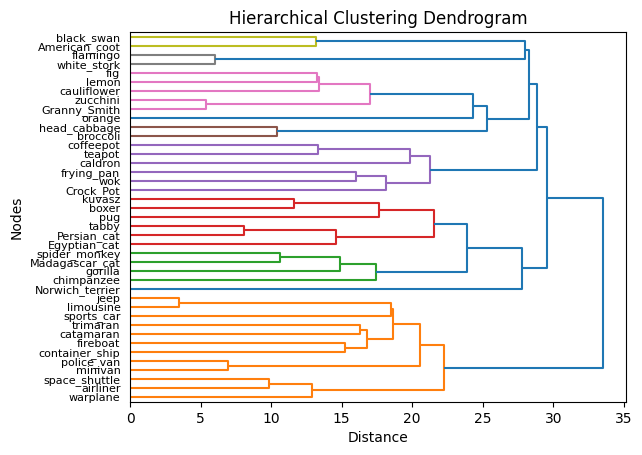

In [5]:
def shortest_distance_matrix(i, j):
    return distance_matrix[i][j]

def plot_dendrogram(Z, labels=None, **kwargs):
    dendrogram(Z, labels=labels, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Distance')
    plt.ylabel('Nodes')
    plt.show()
    
# Find categories in each cluster
def get_cluster_composition(Z, n, selected_categories):
    # Initialize each observation as its own cluster
    clusters = {i: [i] for i in range(n)}
    print(clusters)
    
    
    # Go through each merge step
    merge_composition = []
    for i in range(Z.shape[0]):
        cluster1 = int(Z[i, 0])
        cluster2 = int(Z[i, 1])
        
        # Merge the clusters
        new_cluster = clusters[cluster1] + clusters[cluster2]
        print(f"Step {i}: {new_cluster}")
        # Record the cluster category
        merge_composition.append([selected_categories[idx] for idx in new_cluster])
        clusters[n + i] = new_cluster
    
    return merge_composition
print("creating clustering...")
# Create a distance matrix
condensed_distance_matrix = np.zeros((len(selected_categories), len(selected_categories)))
for i, label1 in enumerate(selected_categories):
    for j, label2 in enumerate(selected_categories):
        # Add edges with weights below the threshold with shortest paths
        try:
            condensed_distance_matrix[i][j] = nx.dijkstra_path_length(G_distances, source=selected_categories[i], target=selected_categories[j])
        except Exception as e:
            logging.error(f"Error processing path: {e}")


#print(condensed_distance_matrix)
# Perform hierarchical clustering
Z = linkage(condensed_distance_matrix, method='single', metric='euclid')

print(Z)


# Number of observations
n = condensed_distance_matrix.shape[0]

# Get the composition of each category at each step
merge_composition = get_cluster_composition(Z, n, selected_categories_names)

category_results_list = [[] for _ in range(len(selected_categories_names))]
for i, comp in enumerate(merge_composition):
  
    print(comp)
    original_comp = comp.copy()
    common_groups = common_group(comp)
    for c in original_comp:
        category_results_list[selected_categories_names.index(c)].append(common_groups[0])
        #print(f"{c}  list  { category_results_list[selected_categories.index(c)]}")
    print("^^^^^^^^^^^^^^^^^^")
    print(f"Step {i+1}: {original_comp}, group named: {common_groups}")
    print("^^^^^^^^^^^^^^^^^^")

for i,category in enumerate(selected_categories_names):
    print(f"{category}: {category_results_list[i]}")
    

# Plot the dendrogram with node names as labels
plot_dendrogram(Z, labels=list(selected_categories), orientation='right')

In [6]:
#method 3
#here we measure the resemblence of the resulted categories to the original hirarcy

ind_to_print = 39
category_scores_list = [[] for _ in range(len(selected_categories_names))]

np.set_printoptions(precision=2, suppress=True)
average_all = np.zeros(len(selected_categories_names) )
print(type(category_scores_list))
for i,category in enumerate(selected_categories_names):   
    hierarchy = get_hierarchy(category)
    hierarchy = hierarchy[::-1]
    results = category_results_list[selected_categories_names.index(category)]
    if (ind_to_print==i):
        print(category)
        print(hierarchy)
        print(results)
    L = len(results)
    x = np.arange(0, L)
   
    samples = np.round(np.linspace(0,len(hierarchy)-1,L))
    diff_samples = np.average(np.diff(samples))
    if (i==ind_to_print):
        print("diff samples is " , diff_samples)
        print(f"samples {samples}")     
   
    for j, r in enumerate(results):
        #print("^^^iteration ", j)
        ind = hierarchy.index(r)
        if (i==ind_to_print):
            print("ind ", ind)
            print(samples[j])
        if (ind > samples[j]):
            val = max(0,1 - (ind - samples[j])/diff_samples )
        else:
            val = 1
        if (i==ind_to_print):
            print("val is ",val)
        category_scores_list[i].append(val)
    vec = np.array(category_scores_list[i])
    if (i==ind_to_print):
        print(vec)
    average_all[i] = np.average(vec[:-1])

for val in average_all:
    print(f"{val:.2f}")

res = np.mean(average_all)
print("final answer")
print(f"{res:.2f}")

    

<class 'list'>
head_cabbage.n.01
['cabbage', 'crucifer', 'herb', 'vascular_plant', 'plant', 'organism', 'living_thing', 'whole', 'object', 'physical_entity', 'entity']
['crucifer', 'entity', 'entity', 'entity', 'entity', 'entity']
diff samples is  2.0
samples [ 0.  2.  4.  6.  8. 10.]
ind  1
0.0
val is  0.5
ind  10
2.0
val is  0
ind  10
4.0
val is  0
ind  10
6.0
val is  0
ind  10
8.0
val is  0
ind  10
10.0
val is  1
[0.5 0.  0.  0.  0.  1. ]
0.86
0.86
0.75
0.80
0.80
0.86
0.20
0.77
0.70
0.64
0.75
0.90
0.90
0.73
0.80
0.89
0.82
0.82
0.64
0.80
0.20
0.33
0.35
0.42
0.60
0.60
0.60
0.60
0.55
0.45
0.54
0.60
0.69
0.00
0.00
0.02
0.00
0.00
0.20
0.10
0.03
final answer
0.54


In [7]:
#method 10 - counting unique categories normalized by the world net number of hierarchies
ind_to_print = 39
category_scores_list = [[] for _ in range(len(selected_categories_names))]

np.set_printoptions(precision=2, suppress=True)
average_all = np.zeros(len(selected_categories_names) )
print(type(category_scores_list))
for i,category in enumerate(selected_categories_names):
    
    
    hierarchy = get_hierarchy(category)
    results = category_results_list[selected_categories_names.index(category)]
    if (ind_to_print==i):
        print(category)
        print(results)
    results = np.unique(results)
    average_all[i]=len(results)/len(hierarchy)
    if (ind_to_print==i):
        print(category)
        print(hierarchy)
        print(results)
    
    
   

for val in average_all:
    print(f"{val:.2f}")
  
    
res = np.mean(average_all)
print("final answer")
print(f"{res:.2f}")


<class 'list'>
head_cabbage.n.01
['crucifer', 'entity', 'entity', 'entity', 'entity', 'entity']
head_cabbage.n.01
['entity', 'physical_entity', 'object', 'whole', 'living_thing', 'organism', 'plant', 'vascular_plant', 'herb', 'crucifer', 'cabbage']
['crucifer' 'entity']
0.27
0.27
0.23
0.27
0.29
0.33
0.12
0.31
0.27
0.25
0.27
0.27
0.27
0.25
0.27
0.30
0.33
0.33
0.25
0.27
0.14
0.17
0.23
0.25
0.27
0.27
0.27
0.27
0.27
0.18
0.20
0.20
0.21
0.17
0.09
0.09
0.17
0.17
0.20
0.18
0.10
final answer
0.23


In [8]:
#method 11 - average of scores of the resulted unique categories. The score represents the position of the category in the original hierarchy
category_scores_list = [[] for _ in range(len(selected_categories_names))]
ind_to_print = 39
np.set_printoptions(precision=2, suppress=True)
average_all = np.zeros(len(selected_categories_names) )

for i,category in enumerate(selected_categories_names):
    hierarchy = get_hierarchy(category)
    results = category_results_list[selected_categories_names.index(category)]
    if (ind_to_print==i):
        print(category)
        print(hierarchy)
        print(results)
    results = np.unique(results)
    if (ind_to_print==i):
        print(results)
    for r in results:
        ind = hierarchy.index(r)
        val = (ind+1)/len(hierarchy)
        category_scores_list[i].append(val)
    vec = np.array(category_scores_list[i])
    if (ind_to_print==i):
        print(vec)
    average_all[i] = np.mean(vec)

for val in average_all:
    print(f"{val:.2f}")

res = np.mean(average_all)
print("final answer")
print(f"{res:.2f}")

    

head_cabbage.n.01
['entity', 'physical_entity', 'object', 'whole', 'living_thing', 'organism', 'plant', 'vascular_plant', 'herb', 'crucifer', 'cabbage']
['crucifer', 'entity', 'entity', 'entity', 'entity', 'entity']
['crucifer' 'entity']
[0.91 0.09]
0.65
0.65
0.62
0.65
0.68
0.71
0.38
0.66
0.52
0.47
0.55
0.55
0.55
0.44
0.48
0.53
0.60
0.60
0.47
0.52
0.43
0.50
0.62
0.67
0.67
0.67
0.67
0.67
0.67
0.50
0.53
0.53
0.57
0.21
0.09
0.09
0.17
0.21
0.55
0.50
0.10
final answer
0.51


In [9]:
#method 12 - sum of scores of the resulted unique categories. The score represents the position of the category in the original hierarchy
category_scores_list = [[] for _ in range(len(selected_categories_names))]
ind_to_print = 39
np.set_printoptions(precision=2, suppress=True)
average_all = np.zeros(len(selected_categories_names) )

for i,category in enumerate(selected_categories_names):
    hierarchy = get_hierarchy(category)
    results = category_results_list[selected_categories_names.index(category)]
    if (ind_to_print==i):
        print(category)
        print(hierarchy)
        print(results)
    results = np.unique(results)
    if (ind_to_print==i):
        print(results)
    for r in results:
        ind = hierarchy.index(r)
        val = (ind+1)/len(hierarchy)
        category_scores_list[i].append(val)
    vec = np.array(category_scores_list[i])
    if (ind_to_print==i):
        print(vec)
    average_all[i] = np.sum(vec)

for val in average_all:
    print(f"{val:.2f}")

res = np.mean(average_all)
print("final answer")
print(f"{res:.2f}")


head_cabbage.n.01
['entity', 'physical_entity', 'object', 'whole', 'living_thing', 'organism', 'plant', 'vascular_plant', 'herb', 'crucifer', 'cabbage']
['crucifer', 'entity', 'entity', 'entity', 'entity', 'entity']
['crucifer' 'entity']
[0.91 0.09]
2.60
2.60
1.85
2.60
2.71
3.53
0.75
3.31
1.55
1.42
1.64
1.64
1.64
1.33
1.45
1.60
2.42
2.42
1.42
1.55
0.86
1.00
1.85
2.00
2.00
2.00
2.00
2.00
2.00
1.00
1.60
1.60
1.71
0.42
0.09
0.09
0.17
0.42
1.10
1.00
0.10
final answer
1.59


In [10]:
#method 14 - average of scores of the resulted categories (without applyting unique)
category_scores_list = [[] for _ in range(len(selected_categories_names))]
ind_to_print = 39
np.set_printoptions(precision=2, suppress=True)
average_all = np.zeros(len(selected_categories_names) )

for i,category in enumerate(selected_categories_names):
    hierarchy = get_hierarchy(category)
    results = category_results_list[selected_categories_names.index(category)]
    if (ind_to_print==i):
        print(category)
        print(hierarchy)
        print(results)
   
    if (ind_to_print==i):
        print(results)
    for r in results:
        ind = hierarchy.index(r)
        val = (ind+1)/len(hierarchy)
        category_scores_list[i].append(val)
    vec = np.array(category_scores_list[i])
    if (ind_to_print==i):
        print(vec)
    average_all[i] = np.mean(vec)

for val in average_all:
    print(f"{val:.2f}")

res = np.mean(average_all)
print("final answer")
print(f"{res:.2f}")

head_cabbage.n.01
['entity', 'physical_entity', 'object', 'whole', 'living_thing', 'organism', 'plant', 'vascular_plant', 'herb', 'crucifer', 'cabbage']
['crucifer', 'entity', 'entity', 'entity', 'entity', 'entity']
['crucifer', 'entity', 'entity', 'entity', 'entity', 'entity']
[0.91 0.09 0.09 0.09 0.09 0.09]
0.63
0.63
0.66
0.57
0.60
0.62
0.27
0.58
0.52
0.48
0.55
0.62
0.62
0.52
0.48
0.62
0.57
0.57
0.54
0.59
0.31
0.36
0.35
0.38
0.53
0.53
0.52
0.52
0.44
0.42
0.48
0.53
0.61
0.11
0.09
0.09
0.17
0.11
0.25
0.23
0.10
final answer
0.45
